In [7]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss
from trainer import Trainer
from utils import Paramset

In [8]:
brest_c = load_breast_cancer()
X = brest_c['data']
y = brest_c['target']

# LightGBM

In [17]:
paramset = Paramset(LGBMClassifier())
paramset.swiching_lr('params_search')
FIT_PARAMS = paramset.generate_params()
FIT_PARAMS

{'learing_rate': 0.05,
 'n_estimators': 100000,
 'max_depth': -1,
 'num_leaves': 31,
 'subsample': 0.65,
 'colsample_bytree': 0.65,
 'bagging_freq': 10,
 'min_child_weight': 10,
 'min_child_samples': 10,
 'min_split_gain': 0.01,
 'random_state': 1112,
 'n_jobs': -1}

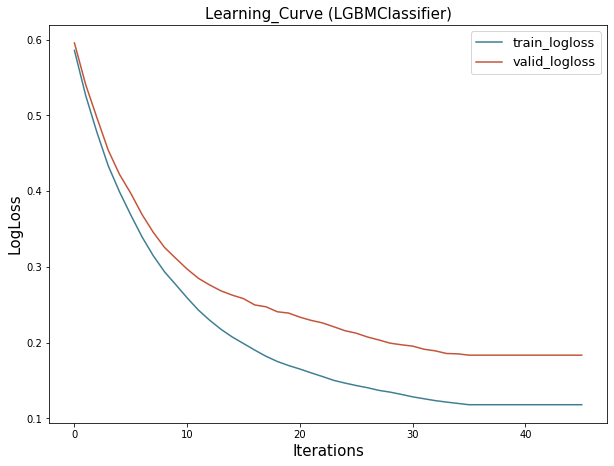

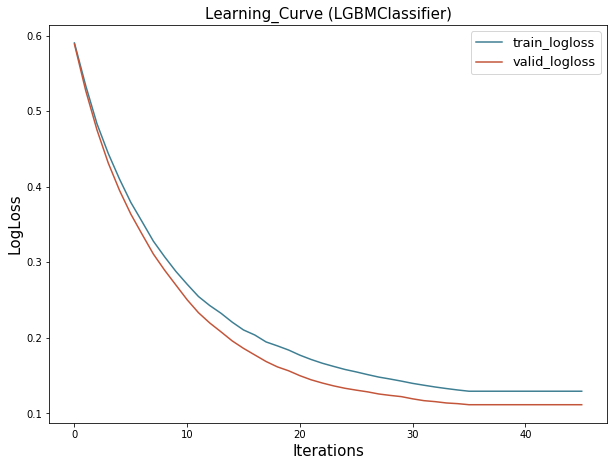

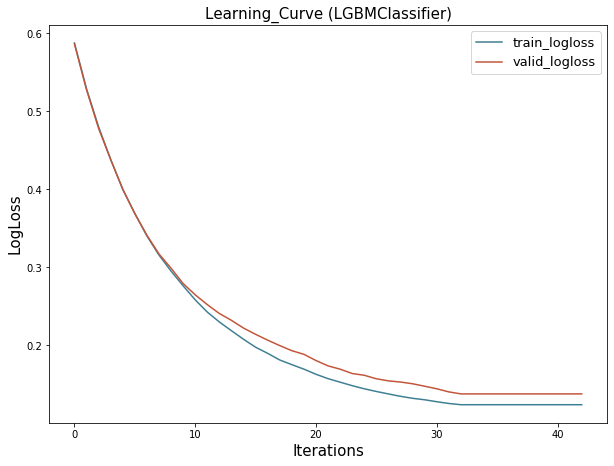

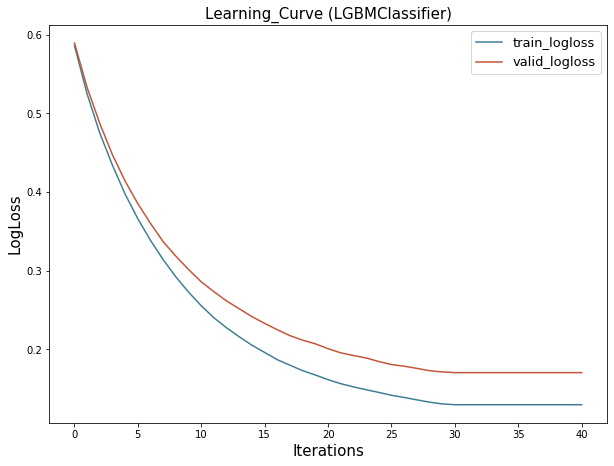

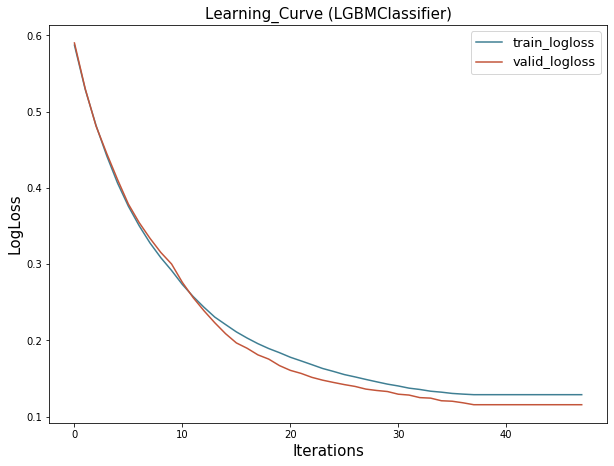

In [18]:
n_splits = 5
random_state = 0
early_stopping_rounds=10
skf = StratifiedKFold(n_splits=n_splits, random_state=random_state, shuffle=True)
for tr_idx, va_idx in skf.split(X, y):
    model = Trainer(LGBMClassifier(**FIT_PARAMS))
    model.fit(
        X[tr_idx],
        y[tr_idx],
        X[va_idx],
        y[va_idx],
        early_stopping_rounds
    )
    model.get_learning_curve()

# XGBoost

In [19]:
paramset = Paramset(XGBClassifier())
paramset.swiching_lr('params_search')
FIT_PARAMS = paramset.generate_params()
FIT_PARAMS

{'learing_rate': 0.05,
 'n_estimators': 100000,
 'max_depth': 9,
 'subsample': 0.65,
 'colsample_bytree': 0.65,
 'gamma': 1,
 'min_child_weight': 10,
 'random_state': 1112,
 'n_jobs': -1}

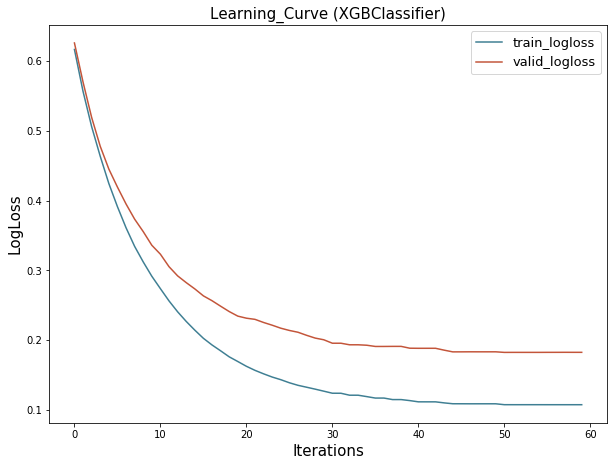

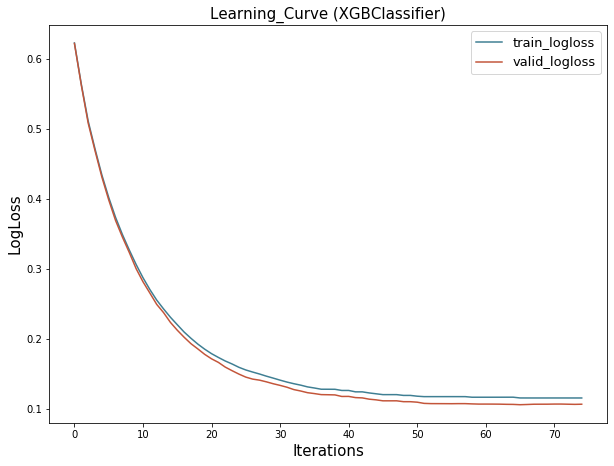

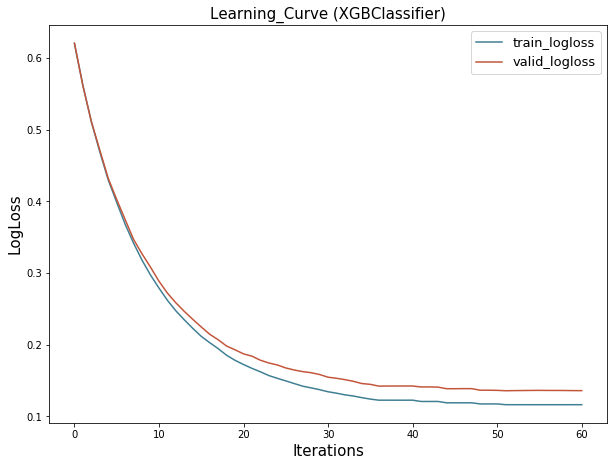

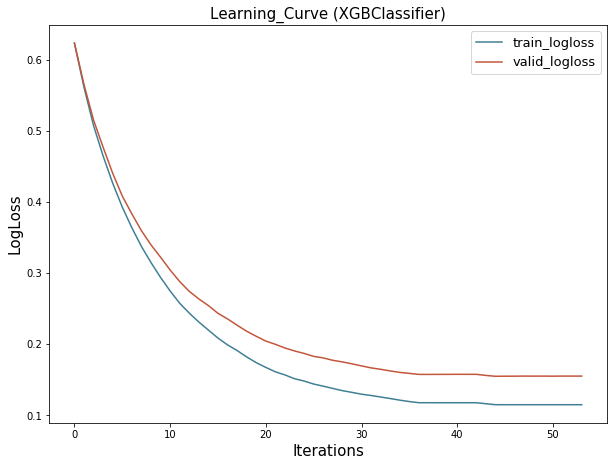

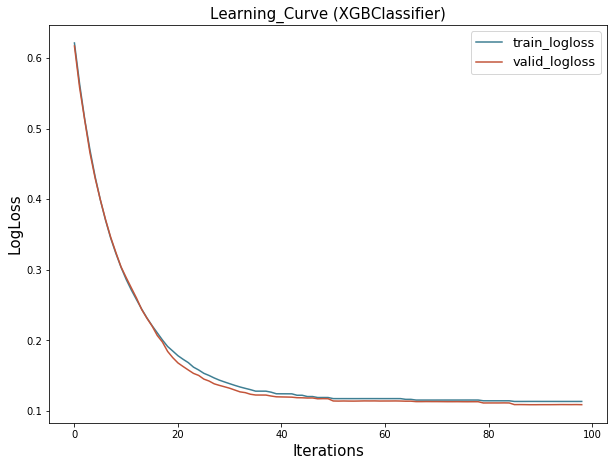

In [20]:
for tr_idx, va_idx in skf.split(X, y):
    model = Trainer(XGBClassifier(**FIT_PARAMS))
    model.fit(
        X[tr_idx],
        y[tr_idx],
        X[va_idx],
        y[va_idx],
        early_stopping_rounds
    )
    model.get_learning_curve()